In [92]:
# Eleuterio Juan Lillo Portero
# AAI FINAL PROJECT
# CIFAR_10 CLASSIFIER

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount Drive for Running on Google Colab (Coment out if running somewhere else)
# from google.colab import drive
# drive.mount('/content/drive')

1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


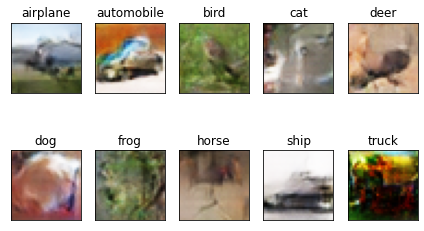

The shape of x_pred is:  (5010, 32, 32, 3)


' Generation of images from GAN model'

In [25]:
# CIFAR-10 classifier and GRAD-CAM based on generated GAN images.
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, AveragePooling2D, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

""" Plot for GAN images"""
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    
    return x_input
 
# Plot the Generated images
def create_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :])
    plt.show()
    
""" Plot for CGAN Images"""
# plot the generated images
def create_plot(samples, x_fake):

    # plot images
    for k in range(samples):
        plt.subplot(2, 5, k + 1, xticks=[], yticks=[])
        plt.imshow(x_fake[k])
        plt.title(class_names[k])
    plt.tight_layout()
    plt.show()
    plt.close()
    
""" CGAN Classifier Training"""

model = load_model('/Users/lutelillo/Desktop/AAI_models/Model_CGAN/CGAN_CIFAR10_generator_model_101.h5')

# generate noise for the model prediction
samples = 10
latent_dim = 100
noise = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
labels = to_categorical(np.arange(0, 10).reshape(-1, 1), num_classes=10)

x_pred = model.predict([noise, labels])
x_pred = (x_pred + 1) / 2.0
for _ in range(500):
    x_con = model.predict([noise, labels])
    x_con = (x_con + 1) / 2.0
    x_pred = np.concatenate((x_con, x_pred))


# Plot
create_plot(samples, x_pred)
print("The shape of x_pred is: ", x_pred.shape)

""" Generation of images from GAN model"""
# # Load GAN model 1
# model = load_model('/content/drive/MyDrive/JUP_CIFAR10_generator_model_055.h5')

# # Generate images
# latent_points = generate_latent_points(100, 100)

# # Generate images
# X_train_conc = model.predict(latent_points)
# for _ in range(49):
#     X_train = model.predict(latent_points)
#     X_train_conc = np.concatenate((X_train, X_train_conc))

# print('Shape of x_train is {}'.format(X_train_conc.shape))
# # scale from [-1,1] to [0,1]
# X = (X_train_conc + 1) / 2.0

# # plot the result
# create_plot(X, 10)

In [34]:
# Pre-porcessing the Cifar_10 DATA
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

y_train = y_train[:10010]
x_test = x_test[:5002]
y_test = y_test[:5002]
x_train = x_train[:5000]

# Used to train the classifier using 'fake' images
x_fin = np.concatenate((x_train, x_pred))

In [35]:
# Normalizing Training and testing data
x_train=x_train/255
x_test=x_test/255
x_pred = x_pred/255

# One hot encoding for 10 class labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [36]:
# Basic cifar_10 classifier w/ 0.93 accuracy
def cifar10_classifier():
    classifier = Sequential()
    
    classifier.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    classifier.add(BatchNormalization())
    
    classifier.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPool2D((2, 2)))
    classifier.add(Dropout(0.2))
    
    classifier.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPool2D((2, 2)))
    classifier.add(Dropout(0.3))
    
    classifier.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPool2D((2, 2)))
    classifier.add(Dropout(0.4))
    
    classifier.add(Flatten())
    
    classifier.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(0.5))
    
    # Output layer of 10 classes from Cifar_10 dataset
    classifier.add(Dense(10, activation='softmax'))
    
    # compile model
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    classifier_hist = classifier.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))
    
    return classifier_hist, classifier
 


In [37]:
# Run and construct classifier
hist, classifier = cifar10_classifier()
classifier.save('/content/drive/MyDrive/cifar_10_class.h5')

Epoch 1/50
313/313 [==============================] - 49s 154ms/step - loss: 2.6522 - accuracy: 0.1603 - val_loss: 2.3664 - val_accuracy: 0.0984
Epoch 2/50
313/313 [==============================] - 49s 156ms/step - loss: 2.2410 - accuracy: 0.2033 - val_loss: 2.3393 - val_accuracy: 0.1008
Epoch 3/50
313/313 [==============================] - 50s 160ms/step - loss: 2.0875 - accuracy: 0.2291 - val_loss: 2.3311 - val_accuracy: 0.1010
Epoch 4/50
313/313 [==============================] - 48s 152ms/step - loss: 1.9778 - accuracy: 0.2650 - val_loss: 2.3325 - val_accuracy: 0.0976
Epoch 5/50
313/313 [==============================] - 47s 151ms/step - loss: 1.9185 - accuracy: 0.2813 - val_loss: 2.3320 - val_accuracy: 0.0992
Epoch 6/50
313/313 [==============================] - 47s 151ms/step - loss: 1.8887 - accuracy: 0.2888 - val_loss: 2.3083 - val_accuracy: 0.1024
Epoch 7/50
313/313 [==============================] - 48s 153ms/step - loss: 1.8406 - accuracy: 0.3094 - val_loss: 2.4398 - val_ac

PermissionDeniedError: /content; Read-only file system

4/4 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 17ms/step


IndexError: ignored

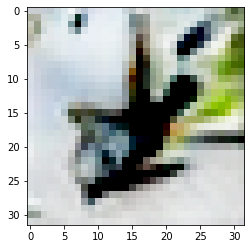

In [107]:
# Example Pediction from the newly constructed classifier
# label mapping
labels = ['airplane', 'automobile', 'bird', 'cat', 'deerdog', 'frog', 'horseship', 'truck']

# Select the image from our test dataset
image_number = np.random.randint(0,99)

# Generates 100 images frmo the pre-trained GAN model.
x_pred = model.predict(latent_points)

# Display the image
pyplot.imshow(x_pred[image_number])

# Load the image in an array
img = np.array(x_pred[image_number])

# Reshape it
p = img.reshape(1, 32, 32, 3)

# Pass in the network for prediction and
# Save the predicted label
predicted_label = labels[classifier.predict(p).argmax()]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))